Ben Starter Code

In [1]:
# Import Dependencies
import pandas as pd
import os
from unidecode import unidecode
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Player_Data_96_22.csv")
Player_Data_96_22_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
Player_Data_96_22_df_clean = Player_Data_96_22_df[["player_name", "team_abbreviation", "age",
                                                   "player_height", "player_weight", "season"]]

# Renaming columns
Player_Data_96_22_df_clean = Player_Data_96_22_df_clean.rename(columns={"player_name":"Player Name",
                                                                        "team_abbreviation":"Team (3 Letter)",
                                                                        "age":"Age",
                                                                        "player_height":"Player Height",
                                                                        "player_weight":"Player Weight",
                                                                        "season":"Season"})

# Standardizing Column text typw and removing periods
Player_Data_96_22_df_clean["Player Name"] = Player_Data_96_22_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
Player_Data_96_22_df_clean["Player Name"] = Player_Data_96_22_df_clean["Player Name"].str.replace('.', '')

# Creating list of seasons to remove from file
removal_year_list = ['1996-97', '1997-98', '1998-99', '2020-21', '2021-22', '2022-23']

# Removing Seasons from file
Player_Data_96_22_df_clean = Player_Data_96_22_df_clean[~Player_Data_96_22_df_clean["Season"].isin(removal_year_list)]

# Saving cleaned file to new folder location in repo
Player_Data_96_22_df_clean.to_csv('clean_data_files/Player_Data_96_22_df_clean.csv')

Player_Data_96_22_df_clean.dtypes

Player Name         object
Team (3 Letter)     object
Age                  int64
Player Height      float64
Player Weight      float64
Season              object
dtype: object

In [3]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/NBA_Demographics.csv")
NBA_Demographics_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
NBA_Demographics_df_clean = NBA_Demographics_df[["Player", "Yrs", "From", "To", "Date", "City", "Region"]]

NBA_Demographics_df_clean = NBA_Demographics_df_clean.rename(columns={"Player":"Player Name",
                                                                      "Yrs":"Seasons in NBA",
                                                                      "From":"First Season Played",
                                                                      "To":"Last Season Played",
                                                                      "Date":"Birthdate",
                                                                      "City":"Birth City",
                                                                      "Region":"Birth State or Country"
                                                                      })

NBA_Demographics_df_clean["Birthdate"] = pd.to_datetime(NBA_Demographics_df_clean["Birthdate"])
NBA_Demographics_df_clean["Player Name"] = NBA_Demographics_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
NBA_Demographics_df_clean["Birth City"] = NBA_Demographics_df_clean["Birth City"].apply(lambda x: unidecode(str(x)))
NBA_Demographics_df_clean["Birth State or Country"] = NBA_Demographics_df_clean["Birth State or Country"].apply(lambda x: unidecode(str(x)))
NBA_Demographics_df_clean["Player Name"] = NBA_Demographics_df_clean["Player Name"].str.replace('.', '')
NBA_Demographics_df_clean["Player Name"] = NBA_Demographics_df_clean["Player Name"].str.replace('*', '')

# Saving cleaned file to new folder location in repo
NBA_Demographics_df_clean.to_csv('clean_data_files/NBA_Demographics_df_clean.csv')

NBA_Demographics_df_clean.dtypes

Player Name                       object
Seasons in NBA                     int64
First Season Played                int64
Last Season Played                 int64
Birthdate                 datetime64[ns]
Birth City                        object
Birth State or Country            object
dtype: object

In [4]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Player Info.csv")
Player_Info_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
Player_Info_df_clean = Player_Info_df[["birthDate","college",
                                       "draft_pick", "draft_round", "draft_team",
                                       "draft_year", "name"]]

Player_Info_df_clean = Player_Info_df_clean.rename(columns={"birthDate":"Birthdate",
                                                            "college":"College Name",
                                                            "draft_pick":"Draft Number Picked",
                                                            "draft_round":"Draft Round",
                                                            "draft_team":"Draft Team",
                                                            "draft_year":"Draft Year",
                                                            "name":"Player Name"
                                                            })

Player_Info_df_clean["Birthdate"] = pd.to_datetime(Player_Info_df_clean["Birthdate"])
Player_Info_df_clean["Player Name"] = Player_Info_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
Player_Info_df_clean["Player Name"] = Player_Info_df_clean["Player Name"].str.replace('.', '')

# Saving cleaned file to new folder location in repo
Player_Info_df_clean.to_csv('clean_data_files/Player_Info_df_clean.csv')

Player_Info_df_clean.dtypes

Birthdate              datetime64[ns]
College Name                   object
Draft Number Picked            object
Draft Round                    object
Draft Team                     object
Draft Year                     object
Player Name                    object
dtype: object

In [5]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/NBA_Team_Names.csv")
NBA_Team_Names_df = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
NBA_Team_Names_df_clean = NBA_Team_Names_df[["abbreviation", "city", 'state', "full_name"]]


NBA_Team_Names_df_clean = NBA_Team_Names_df_clean.rename(columns={"abbreviation":"Team (3 Letter)",
                                                                  "city":"Team City",
                                                                  "state":"Team State",
                                                                  "full_name":"Team Name"})

# Saving cleaned file to new folder location in repo
NBA_Team_Names_df_clean.to_csv('clean_data_files/NBA_Team_Names_df_clean.csv')

In [6]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Player_Salaries.csv")
Player_Salaries_df_clean = pd.read_csv(file_name)

Player_Salaries_df_clean["Player Name"] = Player_Salaries_df_clean["Player Name"].apply(lambda x: unidecode(str(x)))
Player_Salaries_df_clean["Player Name"] = Player_Salaries_df_clean["Player Name"].str.replace('.', '')

# Saving cleaned file to new folder location in repo
Player_Salaries_df_clean.to_csv('clean_data_files/Player_Salaries_df_clean.csv')

In [7]:
# Merging Data Frames

merge_df_1 = pd.merge(NBA_Demographics_df_clean, Player_Info_df_clean, on=["Player Name", "Birthdate"], how="left")
merge_df_1.to_csv("merged_data files/first_merge_attempt.csv")


In [8]:

merge_df_2 = pd.merge(Player_Data_96_22_df_clean, Player_Salaries_df_clean, on=["Player Name", "Season"], how="left")
merge_df_2.to_csv("merged_data files/second_merge_attempt.csv")


In [9]:
merge_df_3 = pd.merge(merge_df_1, merge_df_2, on=["Player Name"], how="left")
merge_df_3.to_csv("merged_data files/third_merge_attempt.csv")

In [10]:
merge_df_4 = pd.merge(merge_df_3, NBA_Team_Names_df_clean, on=["Team (3 Letter)"], how="left")
merge_df_4.to_csv("merged_data files/fourth_merge_attempt.csv")

In [11]:
merge_df_4_filtered = merge_df_4[merge_df_4["First Season Played"] >= 1999]
merge_df_4_filtered = merge_df_4_filtered[merge_df_4_filtered["First Season Played"] <= 2019]
merge_df_4_filtered = merge_df_4_filtered.sort_values(by=['Player Name', 'Season'], ascending=[True, True])

filter_merged_sorted_df = merge_df_4_filtered[["Player Name",
                                               "Birthdate",
                                               "Birth City",
                                               "Birth State or Country",
                                               "College Name",
                                               "Draft Team",
                                               "Draft Year",
                                               "Draft Round",
                                               "Draft Number Picked",
                                               "Seasons in NBA",
                                               "First Season Played",
                                               "Last Season Played",
                                               "Season",
                                               "Age",
                                               "Player Height",
                                               "Player Weight",
                                               "Team (3 Letter)",
                                               "Team City",
                                               "Team Name",
                                               "Salary"
]]

merge_df_4_filtered.to_csv("merged_data files/fouth_merge_attempt_filtered.csv")


In [12]:
folder_path = 'data_files/Cities_States_Countries/'
# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Create the full file path
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over columns and rows in the DataFrame
        for column in df.columns:
            df[column] = df[column].apply(lambda x: unidecode(str(x)) if isinstance(x, str) else x)
            
        # Save the modified DataFrame to a new CSV file
        output_csv_file = os.path.join(folder_path, f'converted_{filename}')
        df.to_csv(output_csv_file, index=False)




In [13]:
# Pulling file from data files folder and converting to DF
file_name = Path("data_files/Cities_States_Countries/converted_states.csv")
states_clean = pd.read_csv(file_name)

# # Keeping only the desired columns and then renaming them
states_clean = states_clean[["name", "country_id", "latitude", "longitude"]]

states_clean = states_clean.rename(columns={"name":"State",
                                            "latitude":"state latitude",
                                            "longitude":"state longitude"
                                            })

states_clean.head()



,State,country_id,state latitude,state longitude
0,Badakhshan,1,36.734772,70.811995
1,Badghis,1,35.167134,63.769538
2,Baghlan,1,36.178903,68.745306
3,Balkh,1,36.755060,66.897537
4,Bamyan,1,34.810007,67.821210


In [14]:
file_name = Path("data_files/Cities_States_Countries/converted_countries.csv")
countries_clean = pd.read_csv(file_name)

# Keeping only the desired columns and then renaming them
countries_clean = countries_clean[["id", "name", "latitude", "longitude"]]


countries_clean = countries_clean.rename(columns={"id":"country_id",
                                            "name":"Country"})

# Saving cleaned file to new folder location in repo
countries_clean.to_csv('data_files/Cities_States_Countries/countries_clean.csv')

countries_clean.head()


,country_id,Country,latitude,longitude
0,1,Afghanistan,33.000000,65.0
1,2,Aland Islands,60.116667,19.9
2,3,Albania,41.000000,20.0
3,4,Algeria,28.000000,3.0
4,5,American Samoa,-14.333333,-170.0


In [15]:
locations = pd.merge(states_clean, countries_clean, on='country_id', how="left")

locations.head()
# # Keeping only the desired columns and then renaming them

# locations = locations.rename(columns={"name_x":"State Name",
#                                             "name_y":"Country Name"
#                                             })

# locations.to_csv("merged_data files/locations.csv")
# locations.head()

,State,country_id,state latitude,state longitude,Country,latitude,longitude
0,Badakhshan,1,36.734772,70.811995,Afghanistan,33.0,65.0
1,Badghis,1,35.167134,63.769538,Afghanistan,33.0,65.0
2,Baghlan,1,36.178903,68.745306,Afghanistan,33.0,65.0
3,Balkh,1,36.755060,66.897537,Afghanistan,33.0,65.0
4,Bamyan,1,34.810007,67.821210,Afghanistan,33.0,65.0


In [16]:
adding_location = pd.merge(merge_df_4_filtered, locations,
                     how='left', 
                     left_on=['Birth State or Country'], 
                     right_on=['State'])

adding_location.loc[adding_location['Country'] != 'United States', 'Country'] = 'International'
adding_location.loc[adding_location['College Name'].isna(), 'College Name'] = 'NaN'
adding_location.loc[adding_location['Draft Number Picked'].isna(), 'Draft Number Picked'] = 'Undrafted'
adding_location.loc[adding_location['Draft Round'].isna(), 'Draft Round'] = 'Undrafted'
adding_location.loc[adding_location['Draft Team'].isna(), 'Draft Team'] = 'Undrafted'
adding_location.loc[adding_location['Draft Year'].isna(), 'Draft Year'] = 'Undrafted'
adding_location = adding_location.drop(['country_id', 'State'], axis=1)
adding_location["Birthdate"] = pd.to_datetime(adding_location["Birthdate"]).dt.year
adding_location = adding_location.dropna(subset=['Team Name'])


adding_location.to_csv("merged_data files/adding_location.csv")


In [17]:
file_name = Path("data_files/stadiums.csv")
stadiums = pd.read_csv(file_name)

adding_stadiums = pd.merge(adding_location, stadiums, how='left', left_on='Team Name', right_on='Team')
adding_stadiums = adding_stadiums.rename(columns={"Lat":"Team Latitude",
                                            "Long":"Team Longitude"})

adding_stadiums = adding_stadiums.drop(['Division', 'League', 'Team'], axis=1)



In [18]:
adding_stadiums.head()
adding_stadiums.to_csv("merged_data files/adding_stadiums.csv")
adding_stadiums.head()

,Player Name,Seasons in NBA,First Season Played,Last Season Played,Birthdate,Birth City,Birth State or Country,College Name,Draft Number Picked,Draft Round,...,Team City,Team State,Team Name,state latitude,state longitude,Country,latitude,longitude,Team Latitude,Team Longitude
0,AJ Bramlett,1,2000,2000,1977,Dekalb,Illinois,University of Arizona,39th overall,2nd round,...,Cleveland,Ohio,Cleveland Cavaliers,40.633125,-89.398528,United States,38.0,-97.0,41.496389,-81.688056
1,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Chicago,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167
2,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Chicago,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167
3,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,San Francisco,California,Golden State Warriors,40.633125,-89.398528,United States,38.0,-97.0,37.768056,-122.387500
4,AJ Hammons,1,2017,2017,1992,Gary,Indiana,Purdue University,46th overall,2nd round,...,Dallas,Texas,Dallas Mavericks,40.267194,-86.134902,United States,38.0,-97.0,32.790556,-96.810278


In [19]:
# Create Regions
regions = {"California": "West", 
           "Hawaii": "West", 
           "Alaska": "West", 
           "Oregon": "West", 
           "Washington": "West", 
           "Nevada": "West",
           "Idaho": "Mountain West", 
           "Montana": "Mountain West", 
           "Wyoming": "Mountain West", 
           "Utah": "Mountain West", 
           "Colorado": "Mountain West",
           "North Dakota": "Midwest", 
           "South Dakota": "Midwest", 
           "Nebraska": "Midwest", 
           "Kansas": "Midwest", 
           "Missouri": "Midwest", 
           "Iowa": "Midwest", 
           "Minnesota": "Midwest", 
           "Wisconsin": "Midwest", 
           "Illinois": "Midwest", 
           "Indiana": "Midwest", 
           "Michigan": "Midwest",
           "Ohio": "Midwest",
           "Arizona": "Southwest", 
           "New Mexico": "Southwest", 
           "Texas": "Southwest", 
           "Oklahoma": "Southwest",
           "Louisiana": "Southeast", 
           "Arkansas": "Southeast", 
           "Mississippi": "Southeast", 
           "Alabama": "Southeast", 
           "Tennessee": "Southeast", 
           "Kentucky": "Southeast", 
           "West Virginia": "Southeast", 
           "Virginia": "Southeast", 
           "North Carolina": "Southeast", 
           "South Carolina": "Southeast", 
           "Georgia": "Southeast", 
           "Florida": "Southeast",
           "Maine": "Northeast", 
           "New Hampshire": "Northeast", 
           "Vermont": "Northeast", 
           "Massachusetts": "Northeast", 
           "Rhode Island": "Northeast", 
           "Connecticut": "Northeast", 
           "New York": "Northeast", 
           "New Jersey": "Northeast",
           "Delaware": "Northeast", 
           "Maryland": "Northeast", 
           "Pennsylvania": "Northeast"}

In [20]:
# Apply the mapping function to create the 'Region' column
adding_stadiums['Region'] = adding_stadiums['Birth State or Country'].apply(lambda state: regions.get(state, 'International'))
adding_stadiums

,Player Name,Seasons in NBA,First Season Played,Last Season Played,Birthdate,Birth City,Birth State or Country,College Name,Draft Number Picked,Draft Round,...,Team State,Team Name,state latitude,state longitude,Country,latitude,longitude,Team Latitude,Team Longitude,Region
0,AJ Bramlett,1,2000,2000,1977,Dekalb,Illinois,University of Arizona,39th overall,2nd round,...,Ohio,Cleveland Cavaliers,40.633125,-89.398528,United States,38.0,-97.0,41.496389,-81.688056,Midwest
1,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167,Midwest
2,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167,Midwest
3,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,California,Golden State Warriors,40.633125,-89.398528,United States,38.0,-97.0,37.768056,-122.387500,Midwest
4,AJ Hammons,1,2017,2017,1992,Gary,Indiana,Purdue University,46th overall,2nd round,...,Texas,Dallas Mavericks,40.267194,-86.134902,United States,38.0,-97.0,32.790556,-96.810278,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,Zhou Qi,2,2018,2019,1996,Henan,China,NaN,43rd overall,2nd round,...,Texas,Houston Rockets,NaN,NaN,International,NaN,NaN,29.750833,-95.362222,International
8059,Zoran Dragic,1,2015,2015,1989,Ljubljana,Slovenia,NaN,Undrafted,Undrafted,...,Florida,Miami Heat,NaN,NaN,International,NaN,NaN,25.781389,-80.188056,International
8060,Zoran Planinic,3,2004,2006,1982,Mostar,Bosnia and Herzegovina,NaN,22nd overall,1st round,...,New York,New York Knicks,NaN,NaN,International,NaN,NaN,40.750556,-73.993611,International
8061,Zoran Planinic,3,2004,2006,1982,Mostar,Bosnia and Herzegovina,NaN,22nd overall,1st round,...,New York,New York Knicks,NaN,NaN,International,NaN,NaN,40.750556,-73.993611,International


In [92]:
# Get 5 year data
season_2004_to_2005 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2004-05",:])
season_2009_to_2010 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2009-10",:])
season_2014_to_2015 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2014-15",:])
season_2019_to_2020 = pd.DataFrame(adding_stadiums.loc[adding_stadiums["Season"] == "2019-20",:])

In [93]:
# Remove unneed columns
season_2004_to_2005 = season_2004_to_2005[['Player Name', 'Region']]
season_2009_to_2010 = season_2009_to_2010[['Player Name', 'Region']]
season_2014_to_2015 = season_2014_to_2015[['Player Name', 'Region']]
season_2019_to_2020 = season_2019_to_2020[['Player Name', 'Region']]


In [94]:
# Count how many players are from each region during each time period
region_counts_2020 = season_2019_to_2020['Region'].value_counts().reset_index()
region_counts_2015 = season_2014_to_2015['Region'].value_counts().reset_index()
region_counts_2010 = season_2009_to_2010['Region'].value_counts().reset_index()
region_counts_2005 = season_2004_to_2005['Region'].value_counts().reset_index()
region_counts_2015

,Region,count
0,International,112
1,Midwest,94
2,Southeast,94
3,West,91
4,Northeast,70
5,Southwest,27
6,Mountain West,4


In [95]:
#Rename count column
region_counts_2020 = region_counts_2020.rename(columns={'count': '2020 Count'})
region_counts_2015 = region_counts_2015.rename(columns={'count': '2015 Count'})
region_counts_2010 = region_counts_2010.rename(columns={'count': '2010 Count'})
region_counts_2005 = region_counts_2005.rename(columns={'count': '2005 Count'})

# Merge dataframes
merged_5_year_data = pd.merge(region_counts_2020, region_counts_2015, on=["Region"], how ="inner")
merged_5_year_data = pd.merge(merged_5_year_data, region_counts_2010, on=["Region"], how ="inner")
merged_5_year_data = pd.merge(merged_5_year_data, region_counts_2005, on=["Region"], how ="inner")
merged_5_year_data

,Region,2020 Count,2015 Count,2010 Count,2005 Count
0,International,107,112,89,72
1,Southeast,81,94,80,61
2,Midwest,78,94,82,81
3,Northeast,60,70,62,48
4,West,55,91,70,43
5,Southwest,29,27,30,16
6,Mountain West,3,4,6,6


In [96]:
# Remove Duplicates
no_dup_nba_region_data = adding_stadiums.drop_duplicates(subset="Player Name")
no_dup_nba_region_data

,Player Name,Seasons in NBA,First Season Played,Last Season Played,Birthdate,Birth City,Birth State or Country,College Name,Draft Number Picked,Draft Round,...,Team State,Team Name,state latitude,state longitude,Country,latitude,longitude,Team Latitude,Team Longitude,Region
0,AJ Bramlett,1,2000,2000,1977,Dekalb,Illinois,University of Arizona,39th overall,2nd round,...,Ohio,Cleveland Cavaliers,40.633125,-89.398528,United States,38.0,-97.0,41.496389,-81.688056,Midwest
1,AJ Guyton,3,2001,2003,1978,Peoria,Illinois,Indiana University,32nd overall,2nd round,...,Illinois,Chicago Bulls,40.633125,-89.398528,United States,38.0,-97.0,41.880556,-87.674167,Midwest
4,AJ Hammons,1,2017,2017,1992,Gary,Indiana,Purdue University,46th overall,2nd round,...,Texas,Dallas Mavericks,40.267194,-86.134902,United States,38.0,-97.0,32.790556,-96.810278,Midwest
5,AJ Price,6,2010,2015,1986,Orange,New Jersey,University of Connecticut,52nd overall,2nd round,...,Indiana,Indiana Pacers,40.058324,-74.405661,United States,38.0,-97.0,39.763889,-86.155556,Northeast
11,Aaron Brooks,10,2008,2018,1985,Seattle,Washington,University of Oregon,26th overall,1st round,...,Texas,Houston Rockets,47.751074,-120.740139,United States,38.0,-97.0,29.750833,-95.362222,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,Zendon Hamilton,6,2001,2006,1975,Floral Park,New York,St. John's University,Undrafted,Undrafted,...,California,LA Clippers,40.712775,-74.005973,United States,38.0,-97.0,34.043056,-118.267222,Northeast
8055,Zhaire Smith,2,2019,2020,1999,Garland,Texas,Texas Tech University,16th overall,1st round,...,Pennsylvania,Philadelphia 76ers,31.968599,-99.901813,United States,38.0,-97.0,39.901111,-75.171944,Southwest
8057,Zhou Qi,2,2018,2019,1996,Henan,China,NaN,43rd overall,2nd round,...,Texas,Houston Rockets,NaN,NaN,International,NaN,NaN,29.750833,-95.362222,International
8059,Zoran Dragic,1,2015,2015,1989,Ljubljana,Slovenia,NaN,Undrafted,Undrafted,...,Florida,Miami Heat,NaN,NaN,International,NaN,NaN,25.781389,-80.188056,International


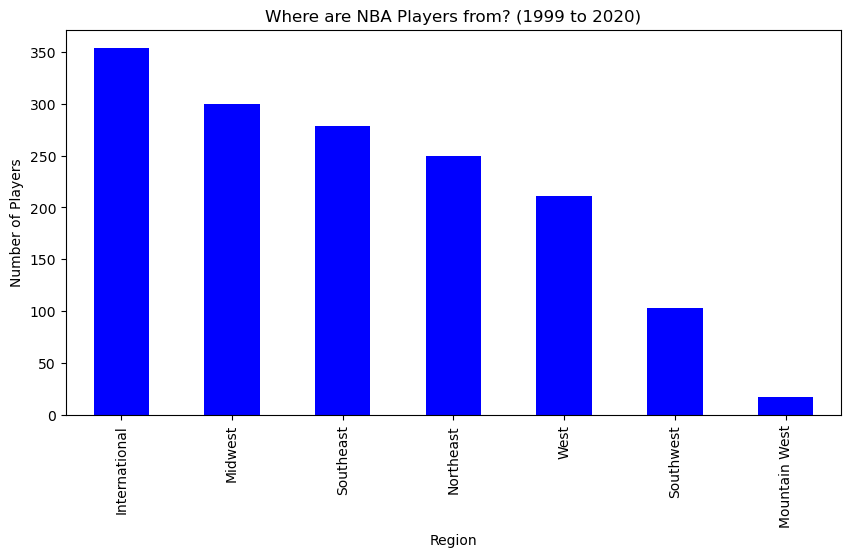

In [97]:
# Create Bar Chart for Player Region Data
region_data = no_dup_nba_region_data.groupby(['Region']).count()
region_bar_data = region_data['Player Name']
region_bar_data = region_bar_data.sort_values(ascending = False)
region_bar_data.plot(kind = 'bar', figsize = (10,5), color = 'blue', align = 'center')
plt.title("Where are NBA Players from? (1999 to 2020)")
plt.xlabel("Region")
plt.ylabel("Number of Players")
plt.show()

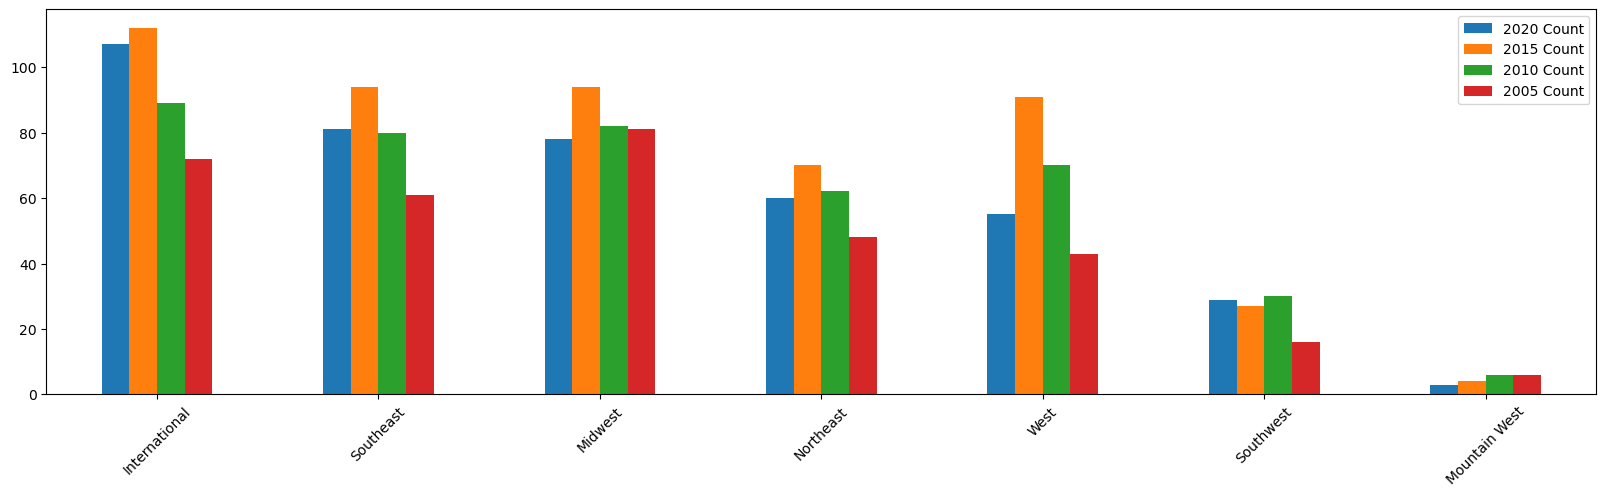

<Figure size 640x480 with 0 Axes>

In [98]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = merged_5_year_data.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(merged_5_year_data["Region"], rotation=45)

plt.show()
plt.tight_layout()